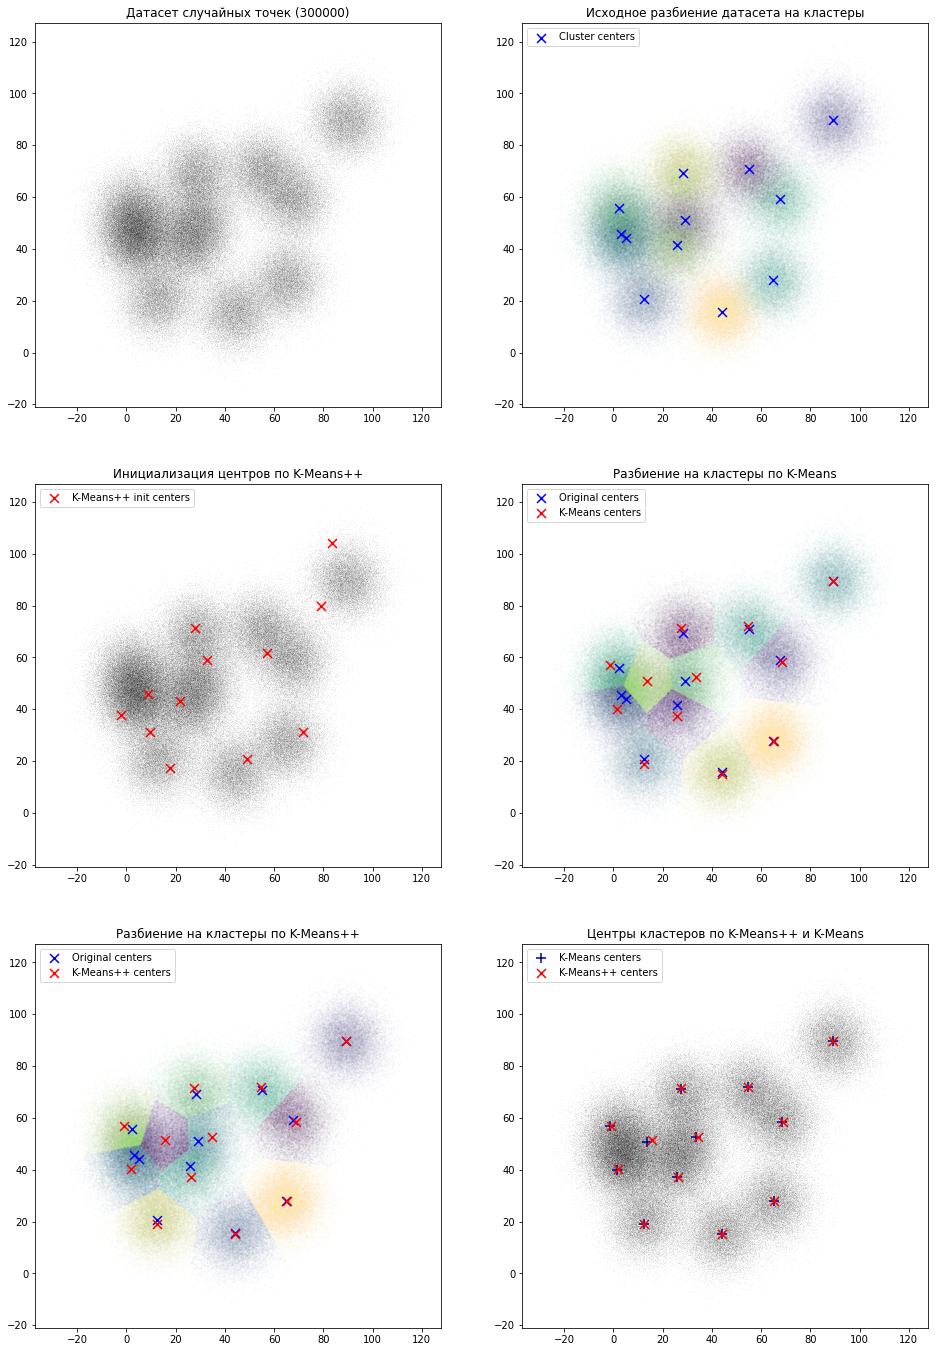

In [88]:
#################################################################################
# Кластеризация. Задание на выбор:                                              #
# a) Исследовательская задача. Провести полный кластерный анализ датасета.      #
#    Т.е. поэкспериментировать с метриками и алгоритмами кластеризации. На      #
#    основе этих действий построить предполагаемые классы и сделать гипотезу    #
#    о семантических свойствах такого разбиения. Проверить эту гипотезу         #
#    (описать какими критериями пользовались).                                  #
# b) Техническая задача. На плоских данных провести кластеризацию с помощью     #
#    k-means++. Т.е. для начала на случайной подвыборке оценить число           #
#    кластеров, их положения относительно друг друга, построить приближение     #
#    центров кластеров. На основе полученных результатов провести k-means. В    #
#    отчете представить результаты в графическом виде(для плоских данных это    #
#    вполне просто и наглядно). Данные должны быть сгенерированы случайным      #
#    образом, на основе различных распределений и содержать не менее 10^6       #
#    точек.                                                                     #
#################################################################################

# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans

# Константы настройки
N_SAMPLES = 300000
N_CENTERS = 12
RANDOM_STATE = 3
CENTER_BOX = (0, 100)

# Возвращает набор точек на плоскости
def createDots(n_samples, n_centers, center_box):
    return make_blobs(n_samples=N_SAMPLES, 
                      centers=N_CENTERS, 
                      n_features=2, 
                      cluster_std=8, 
                      random_state=RANDOM_STATE, 
                      center_box=CENTER_BOX, 
                      return_centers=True)

# Производит кластеризацию набора данных методом K-Means или K-Means++
# и сравнивает с оригинальным разбиением на кластеры
def runKMeans(data, target, centers):
    # Инициализация K-Means и K-Means++
    kMeans = KMeans(n_clusters=N_CENTERS, random_state=RANDOM_STATE, init='random')
    kMeansPP = KMeans(n_clusters=N_CENTERS, random_state=RANDOM_STATE, init='k-means++')
    
    # Calculate seeds from kmeans++
    centers_init, indices = kmeans_plusplus(data, n_clusters=N_CENTERS, random_state=RANDOM_STATE)
    
    # Обучение K-Means и K-Means++
    kMeans.fit(data)
    kMeansPP.fit(data)
    
    # Графики
    fig, ax = plt.subplots(3, 2)
    fig.set_figwidth(16)
    fig.set_figheight(24)
    
    # Инициализация точечных диаграмм (начальные данные)
    ax[0][0].set_facecolor('white')
    ax[0][0].set_title('Датасет случайных точек (' + str(N_SAMPLES) + ')')
    ax[0][0].scatter(data[:, 0], 
                     data[:, 1], 
                     c = 'black', 
                     marker='.', 
                     s = 0.0005)
    ax[0][1].set_facecolor('white')
    ax[0][1].set_title('Исходное разбиение датасета на кластеры')
    ax[0][1].scatter(data[:, 0], 
                     data[:, 1], 
                     c = target, 
                     marker='.', 
                     s = 0.0005)
    ax[0][1].scatter(centers[:, 0], 
                     centers[:, 1], 
                     c = 'blue', 
                     marker='x', 
                     s = 80, 
                     label='Cluster centers')
    ax[1][0].set_facecolor('white')
    ax[1][0].set_title('Инициализация центров по K-Means++')
    ax[1][0].scatter(data[:, 0], 
                     data[:, 1], 
                     c = 'black', 
                     marker='.', 
                     s = 0.0005)
    ax[1][0].scatter(centers_init[:, 0], 
                     centers_init[:, 1], 
                     c = 'red', 
                     marker='x', 
                     s = 80, 
                     label='K-Means++ init centers')
    
    # Инициализация точечных диаграмм (результаты обучения)
    ax[1][1].set_facecolor('white')
    ax[1][1].set_title('Разбиение на кластеры по K-Means')
    ax[1][1].scatter(data[:, 0], 
                     data[:, 1], 
                     c = kMeans.labels_, 
                     marker='.', 
                     s = 0.0005)
    ax[1][1].scatter(centers[:, 0], 
                     centers[:, 1], 
                     c = 'blue', 
                     marker='x', 
                     s = 80, 
                     label='Original centers')
    ax[1][1].scatter(kMeans.cluster_centers_[:, 0], 
                     kMeans.cluster_centers_[:, 1], 
                     c = 'red', 
                     marker='x', 
                     s = 80, 
                     label='K-Means centers')
    ax[2][0].set_facecolor('white')
    ax[2][0].set_title('Разбиение на кластеры по K-Means++')
    ax[2][0].scatter(data[:, 0], 
                     data[:, 1], 
                     c = kMeansPP.labels_, 
                     marker='.', 
                     s = 0.0005)
    ax[2][0].scatter(centers[:, 0], 
                     centers[:, 1], 
                     c = 'blue', 
                     marker='x', 
                     s = 80, 
                     label='Original centers')
    ax[2][0].scatter(kMeansPP.cluster_centers_[:, 0], 
                     kMeansPP.cluster_centers_[:, 1], 
                     c = 'red', 
                     marker='x', 
                     s = 80, 
                     label='K-Means++ centers')
    ax[2][1].set_facecolor('white')
    ax[2][1].set_title('Центры кластеров по K-Means++ и K-Means')
    ax[2][1].scatter(data[:, 0], 
                     data[:, 1], 
                     c = 'black', 
                     marker='.', 
                     s = 0.0005)
    ax[2][1].scatter(kMeans.cluster_centers_[:, 0], 
                     kMeans.cluster_centers_[:, 1], 
                     c = 'darkblue', 
                     marker='+', 
                     s = 120, 
                     label='K-Means centers')
    ax[2][1].scatter(kMeansPP.cluster_centers_[:, 0], 
                     kMeansPP.cluster_centers_[:, 1], 
                     c = 'red', 
                     marker='x', 
                     s = 80, 
                     label='K-Means++ centers')
    ax[0][1].legend()
    ax[1][0].legend()
    ax[1][1].legend()
    ax[2][0].legend()
    ax[2][1].legend()
    plt.show()

# Генерируем датасет точек на плоскости
data, target, centers = createDots(N_SAMPLES, N_CENTERS, CENTER_BOX)

# Анализ методов K-Means и K-Means++
runKMeans(data, target, centers)
